In [1]:
#converting jupyter notebook to python file
# !jupyter nbconvert --to script data_augmentation_final.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook data_augmentation_final.ipynb to script
[NbConvertApp] Writing 19416 bytes to data_augmentation_final.py


In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import sin, cos
import random
from pathlib import Path


In [2]:
%run data_visualization.ipynb

NotJSONError: Notebook does not appear to be JSON: '{\n "cells": [\n  {\n   "cell_type": "c...

In [3]:
# Get all labels
names = []
for dir in os.listdir("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/reformatting-the-data/data_25_labels"):
    if dir !=  '.DS_Store':
        names.append(dir)
names

['research',
 'hear',
 'music',
 'brother',
 'ocean',
 'many',
 'i love you',
 'dog',
 'polite',
 'milk',
 'bookstore',
 'doctor',
 'i',
 'classroom',
 'focus',
 'money',
 'coffee',
 'book',
 'phone',
 'chicken',
 'photographer',
 'hamburger',
 'good morning',
 'open',
 'door']

In [3]:
test_arr = np.array([[1,2,3,4],[5,6,7,8]], dtype=np.float32)
# test_arr[:,:2]
origin = np.mean(test_arr[:,:2], axis=0)
test_arr[:,:2] -= origin
origin, test_arr

(array([3., 4.], dtype=float32),
 array([[-2., -2.,  3.,  4.],
        [ 2.,  2.,  7.,  8.]], dtype=float32))

In [4]:
test_arr[:,2] = 1
test_arr

array([[-2., -2.,  1.,  4.],
       [ 2.,  2.,  1.,  8.]], dtype=float32)

In [5]:
test_arr[:, 1]

array([-2.,  2.], dtype=float32)

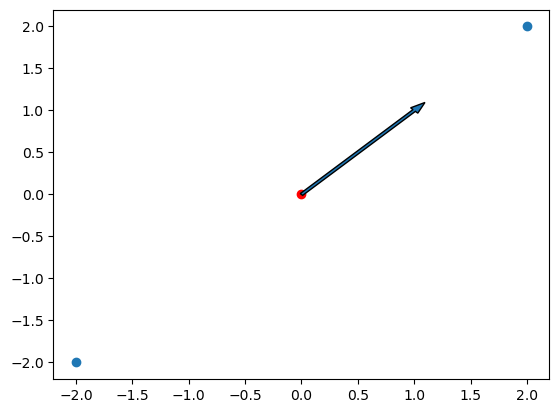

In [6]:
plt.scatter(test_arr[:,0], test_arr[:, 1])
plt.scatter(0, 0, c="red")
plt.arrow(0,0,1,1, width=0.03)
plt.show()

In [7]:
# df = pd.read_csv("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/demo.csv")
df = pd.read_csv("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/demo.csv")
df

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z73,v73,x74,y74,z74,v74,x75,y75,z75,v75
0,0.481783,0.263291,-0.251268,0.997624,0.480460,0.229660,-0.217402,0.996738,0.482711,0.231598,...,0.026680,0.0,0.758639,0.786082,0.021126,0.0,0.759593,0.798603,0.017296,0.0
1,0.481630,0.262819,-0.284726,0.997663,0.480498,0.228990,-0.248803,0.996778,0.482889,0.231058,...,0.023139,0.0,0.762222,0.792105,0.017242,0.0,0.762655,0.803301,0.012939,0.0
2,0.481624,0.262759,-0.297694,0.997736,0.480709,0.228824,-0.262779,0.996833,0.483267,0.230927,...,0.022072,0.0,0.767398,0.792813,0.015944,0.0,0.769933,0.805204,0.011419,0.0
3,0.481631,0.262273,-0.336054,0.997899,0.480730,0.228454,-0.301580,0.997060,0.483295,0.230480,...,0.023919,0.0,0.765285,0.792616,0.018403,0.0,0.767586,0.805106,0.014234,0.0
4,0.481666,0.262271,-0.313654,0.998036,0.480804,0.228475,-0.279114,0.997251,0.483347,0.230481,...,0.020449,0.0,0.767699,0.786754,0.014595,0.0,0.768883,0.800170,0.010294,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.478060,0.265460,-0.202545,0.999748,0.476053,0.231684,-0.169041,0.999652,0.478467,0.232754,...,0.007984,0.0,0.782588,0.741258,0.000239,0.0,0.782818,0.760302,-0.004702,0.0
70,0.478110,0.266470,-0.194980,0.999749,0.476170,0.232698,-0.159386,0.999653,0.478609,0.233749,...,0.011121,0.0,0.781909,0.746467,0.004765,0.0,0.782318,0.764514,0.000574,0.0
71,0.478078,0.267380,-0.193164,0.999755,0.476191,0.233562,-0.158247,0.999660,0.478656,0.234627,...,0.006822,0.0,0.794213,0.731202,0.002150,0.0,0.796758,0.750495,-0.000858,0.0
72,0.478067,0.267776,-0.195722,0.999757,0.476218,0.234010,-0.160146,0.999661,0.478696,0.235053,...,0.002802,0.0,0.798200,0.729334,-0.003268,0.0,0.803871,0.750718,-0.007041,0.0


In [8]:
#test

frame = df.iloc[0].to_numpy()
frame = frame.reshape((75, 4))
frame[0]
# new_frame = rotate(frame, 5)
# print(new_frame[0])
# print(frame[0])

array([ 0.481783  ,  0.26329112, -0.25126788,  0.99762374])

In [9]:
df.to_numpy().shape

(74, 300)

In [10]:
all_frames = df.to_numpy().reshape((len(df), 75, 4))
all_frames[0][0]
all_frames.shape

(74, 75, 4)

In [11]:
print(f"standard variation x: {np.std(all_frames[:, :, 0])}")
print(f"standard variation y: {np.std(all_frames[:, :, 1])}")
print(f"standard variation z: {np.std(all_frames[:, :, 2])}")

standard variation x: 0.19378888865030636
standard variation y: 0.45007529575079847
standard variation z: 0.1921295540159871


In [12]:
def change_origin(frame):
  new_origin = np.mean(frame[:,:2], axis=0)
  # print(new_origin.shape)
  new_frame = np.copy(frame)
  new_frame[:,:2] -= new_origin
  return frame, new_frame 

In [13]:
def visualize_rotation(func):

  def wrap(*args, **kwargs):
    original_frame, new_frame = func(*args, **kwargs)
    plt.scatter(original_frame[:, 0], original_frame[:, 1], c="blue", label="original_data")
    plt.scatter(new_frame[:, 0], new_frame[:, 1], c="red", label="new data")
    plt.scatter(0, 0, c="black")
    plt.annotate("origin", (0,0))
    plt.arrow(0, 0, original_frame[0][0], original_frame[0][1], length_includes_head=True, color="blue", head_width=0.03)
    plt.arrow(0, 0, new_frame[0][0], new_frame[0][1], length_includes_head=True, color="red", head_width=0.03)
    plt.legend()
    return original_frame, new_frame

  return wrap

In [14]:
def visualize(frame):
    plt.scatter(frame[:, 0], frame[:, 1])


In [15]:
@visualize_rotation
def rotate(frame, angle, origin=[0, 0]):
    normalized_frame = change_origin(frame)
    angle_rad = math.radians(angle)
    new_frame = np.copy(frame)
    rotation_matrix = np.array([[cos(angle_rad), -sin(angle_rad)], [sin(angle_rad), cos(angle_rad)]])
    for i in range(len(new_frame)):
        new_frame[i][:2] = np.matmul(rotation_matrix, new_frame[i][:2])
    return frame, new_frame

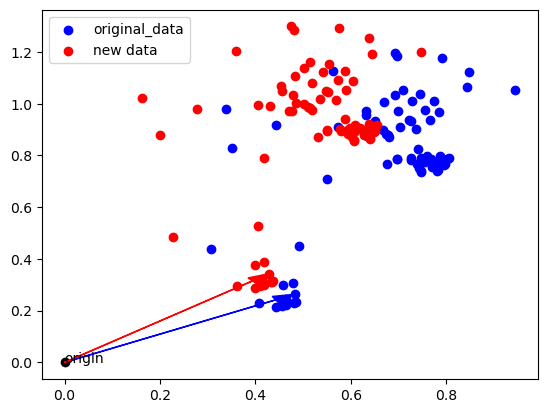

In [16]:
#rotation without changing origin
_, f1 = rotate(all_frames[0], 10)

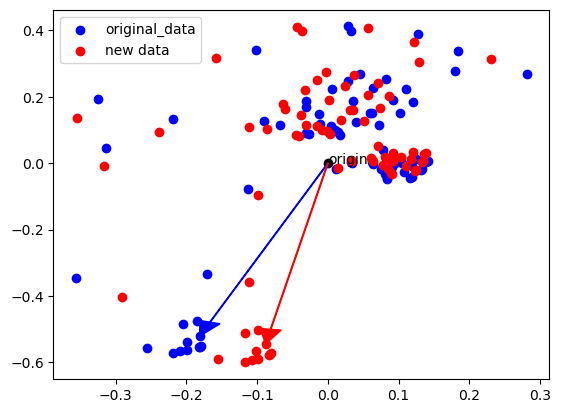

In [17]:
_, frame = change_origin(all_frames[0])
_, _=rotate(frame, 10)

In [9]:
class VectorTransformation():

  def __init__(self, center_data=True, translation_x=0, translation_y=0, rotation_angle=0, 
               shear_x=0, shear_y=0, scaling_x=0, scaling_y=0, reflection=True, random=False):
    self.random = random
    self.center = center_data
    self.reflect = reflection

    self.tx_max = translation_x
    self.ty_max = translation_y
    self.angle_max = math.radians(rotation_angle)
    self.shx_max = shear_x
    self.shy_max = shear_y
    self.scale_x_max = scaling_x
    self.scale_y_max = scaling_y

    self.tx = translation_x
    self.ty = translation_y
    self.angle = math.radians(rotation_angle)
    self.shx = shear_x
    self.shy = shear_y
    self.scale_x= scaling_x
    self.scale_y = scaling_y

  def translation_matrix(self):
    return np.array([[1, 0, self.tx],
                    [0, 1, self.ty],
                    [0, 0, 1]])

  def rotation_matrix(self):
    return np.array([[cos(self.angle), -sin(self.angle), 0], 
                       [sin(self.angle), cos(self.angle), 0],
                       [0, 0, 1]])

  def shearx_matrix(self, sign=0):
    return np.array([[1, ((-1)**sign)*self.shx, 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
  def sheary_matrix(self, sign=0):
    return np.array([[1, 0, 0],
                     [((-1)**sign)*self.shy, 1, 0],
                     [0, 0, 1]])
    
  def scaling_matrix(self):
    return np.array([[1+self.scale_x, 0, 0],
                     [0, 1+self.scale_y, 0], 
                     [0, 0, 1]])
    
  def reflection_matrix(self):
    return np.array([[(-1)**(int(self.reflect)), 0, 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
  def change_origin(self, frame):
    new_origin = np.mean(frame[:,:2], axis=0)
    new_frame = np.copy(frame)
    new_frame[:,:2] -= new_origin
    return new_frame 

In [10]:
def add_to_class(Class):  
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [11]:
@add_to_class(VectorTransformation)
def transform(self, frame, change_shear_direction=False):
    new_frame = np.copy(frame)
    # new_frame = np.reshape((1, 3))
    new_frame[:, 2] = 1

    if self.center:
            new_frame = self.change_origin(new_frame)

    for i in range(len(new_frame)):
        new_frame[i][:3] = np.matmul(self.reflection_matrix(), new_frame[i][:3])
        # print(new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.translation_matrix(), new_frame[i][:3])
        if change_shear_direction:
          new_frame[i][:3] = np.matmul(self.shearx_matrix(int(new_frame[i][0]*new_frame[i][1]<0)), new_frame[i][:3])
          # print("shear x:", self.shearx_matrix(int(new_frame[i][0]*new_frame[i][1]<0)))
          # print("sign: ", int(new_frame[i][0]*new_frame[i][1]<0))
          new_frame[i][:3] = np.matmul(self.sheary_matrix(int(new_frame[i][0]*new_frame[i][1]<0)), new_frame[i][:3])
        else:
          new_frame[i][:3] = np.matmul(self.shearx_matrix(), new_frame[i][:3])
          # print("shear x:", self.shearx_matrix())
          new_frame[i][:3] = np.matmul(self.sheary_matrix(), new_frame[i][:3])

        # print(new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.rotation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.scaling_matrix(), new_frame[i][:3])

    new_frame[:, 2] = frame[:, 2]
        
    return new_frame


In [12]:
@add_to_class(VectorTransformation)
def visualize_change(self, original_frame, new_frame, plot=False):
    if plot:
      plt.plot(original_frame[:, 0], original_frame[:, 1], c="blue")
      plt.plot(new_frame[:, 0], new_frame[:, 1], c="red")
    plt.title(f"translation: ({self.tx:.3f}, {self.ty:.3f})\nrotation: {self.angle:.3f},\n shear: ({self.shx:.3f}, {self.shy:.3f})\n scaling: ({self.scale_x:.3f}, {self.scale_y:.3f})")
    plt.scatter(original_frame[:, 0], original_frame[:, 1], c="blue", label="original_data")
    plt.scatter(new_frame[:, 0], new_frame[:, 1], c="red", label="new data")
    plt.scatter(0, 0, c="black")
    plt.annotate("origin", (0,0))
    plt.arrow(0, 0, original_frame[0][0], original_frame[0][1], length_includes_head=True, color="blue", head_width=0.03)
    plt.arrow(0, 0, new_frame[0][0], new_frame[0][1], length_includes_head=True, color="red", head_width=0.03)
    plt.axhline(y=0, color="black")
    plt.axvline(x=0, color="black")
    plt.legend()
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim([min(np.amin(original_frame[:, 0]), np.amin(new_frame[:, 0]))-1, max(np.amax(original_frame[:, 0]), np.amax(new_frame[:, 0]))+1])
    plt.ylim([min(np.amin(original_frame[:, 1]), np.amin(new_frame[:, 1]))-1, max(np.amax(original_frame[:, 1]), np.amax(new_frame[:, 1]))+1])

In [22]:
data_aug = VectorTransformation(shear_x=0.2, reflection=False, center_data=True)
new_frame = data_aug.transform(all_frames[0])
# new_frame

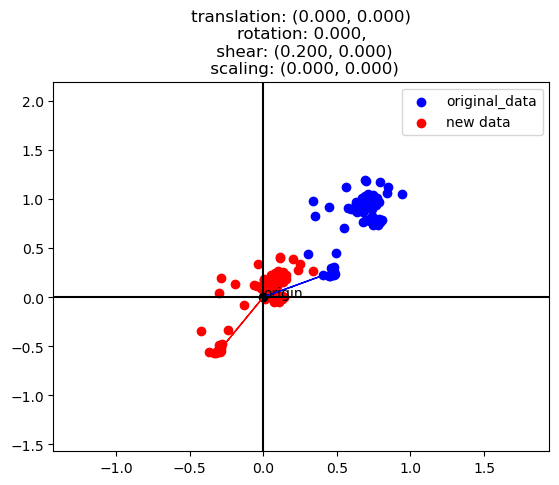

In [23]:
_, frame = change_origin(new_frame)
data_aug.visualize_change(all_frames[0], frame)

##random funcitons


In [13]:
@add_to_class(VectorTransformation)
def set_random_variables(self):
  if self.random:
    self.tx = random.uniform(0, self.tx_max)
    self.ty = random.uniform(0, self.ty_max)
    self.angle = random.uniform(0, self.angle_max)
    self.shx = random.uniform(0, self.shx_max)
    self.shy = random.uniform(0, self.shy_max)
    self.scale_x= random.uniform(0, self.scale_x_max)
    self.scale_y = random.uniform(0, self.scale_y_max)

In [14]:
import random 

@add_to_class(VectorTransformation)
def random_translation_matrix(self):
    return np.array([[1, 0, random.uniform(0, self.tx)],
                         [0, 1, self.ty],
                         [0, 0, 1]])

@add_to_class(VectorTransformation)
def random_rotation_matrix(self):
    return np.array([[cos(random.uniform(0, self.angle)), -sin(random.uniform(0,self.angle)), 0], 
                    [sin(random.uniform(0, self.angle)), cos(random.uniform(0, self.angle)), 0],
                    [0, 0, 1]])
  
@add_to_class(VectorTransformation)
def random_shearx_matrix(self):
    return np.array([[1, random.uniform(0, self.shx), 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
@add_to_class(VectorTransformation)
def random_sheary_matrix(self):
  return np.array([[1, 0, 0],
                  [random.uniform(0, self.shy), 1, 0],
                  [0, 0, 1]])
    
@add_to_class(VectorTransformation)
def random_scaling_matrix(self):
  return np.array([[random.uniform(1, self.scale_x), 0, 0],
                  [0, random.uniform(1, self.scale_y), 0], 
                  [0, 0, 1]])

In [15]:
@add_to_class(VectorTransformation)
def random_transform(self, frame):
    new_frame = np.copy(frame[:, :2])
    # new_frame = new_frame.reshape((1, 3))
    new_frame[:, 2] = 1

    #centering
    if self.center:
      new_frame = self.change_origin(frame)

    for i in range(len(new_frame)):
        new_frame[i][:3] = np.matmul(self.reflection_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_translation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_rotation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_shearx_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_sheary_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_scaling_matrix(), new_frame[i][:3])

    new_frame[:, 2] = frame[:, 2]
        
    return new_frame

In [16]:
@add_to_class(VectorTransformation)
def get_new_data(self, frames: list([]), ratio, random=True):
  new_data = []
  # new_labels = []
  for j in range(ratio):
    new_video = []
    self.set_random_variables()
    for i in range(len(frames)):
      new_video.append(self.transform(frames[i]))
        # new_labels.append(labels[i])
    new_data.append(new_video)


  # return new_data, new_labels
  return new_data

##generating data

In [17]:
data_augmentation = VectorTransformation(translation_x=0.1, translation_y=0.1, shear_x=0.1, shear_y=0.1, reflection=False,
                                         rotation_angle=20, center_data=False, random=True)

new_data = data_augmentation.get_new_data(all_frames, 4)
new_data = np.array(list(new_data))
new_data.shape

NameError: name 'all_frames' is not defined

In [29]:
print(all_frames[50][0], new_data[0][50][0])
all_frames[10][0], new_data[0][10][0]

[ 0.47979188  0.26481342 -0.13737114  0.99985009] [ 0.48905892  0.40779979 -0.13737114  0.99985009]


(array([ 0.44027525,  0.25504592, -0.38332391,  0.9986214 ]),
 array([ 0.45077966,  0.39065935, -0.38332391,  0.9986214 ]))

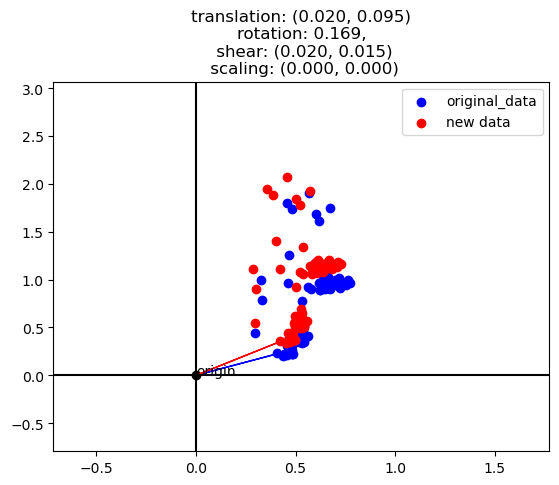

In [30]:
data_augmentation.visualize_change(all_frames[50], new_data[0][50])

In [ ]:
# Evaluate which values are good for each transformation
# Maybe use Unsupervised learning and cluster the augmented data with the original data as centroids


##Visualization on shapes

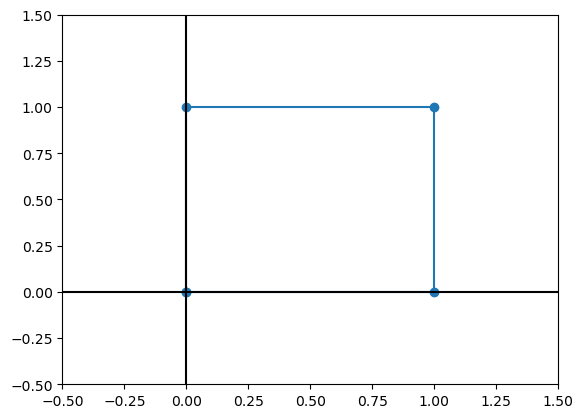

In [31]:
square = np.array([[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1]], dtype=np.float32)
plt.plot(square[:, 0], square[:, 1])
plt.scatter(square[:, 0], square[:, 1])
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")

In [32]:
vt = VectorTransformation(translation_x=1, center_data=False, reflection=False)
new_square = vt.transform(square)
new_square

array([[1., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.]], dtype=float32)

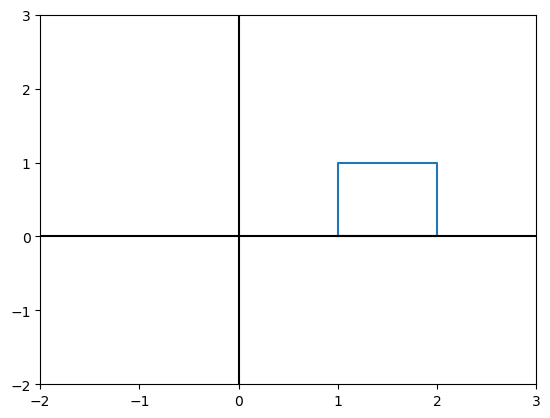

In [33]:
plt.plot(new_square[:, 0], new_square[:, 1])
plt.xlim([-2, 3])
plt.ylim([-2, 3])
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")


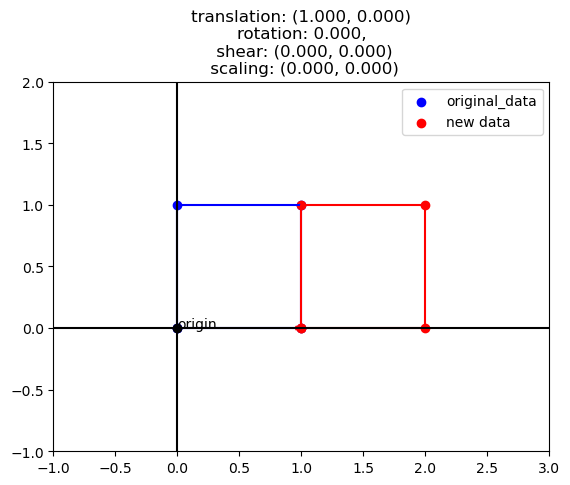

In [34]:
vt.visualize_change(square, new_square, plot=True)

In [35]:
vt.shx = 0.5
vt.shy = 1
vt.center = True
square3 = vt.transform(square[:-1])
square3

array([[ 0.25, -0.25,  1.  ],
       [ 1.25,  0.75,  1.  ],
       [ 1.75,  2.25,  1.  ],
       [ 0.75,  1.25,  1.  ]], dtype=float32)

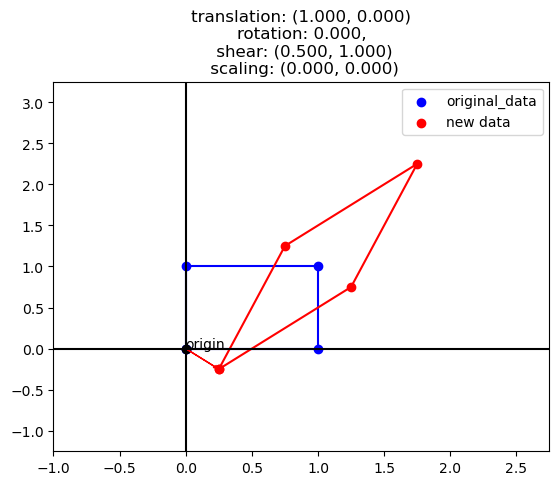

In [36]:
square3 = np.append(square3, [square3[0]]).reshape(square.shape)
vt.visualize_change(square, square3, plot=True)

In [37]:
vt2 = VectorTransformation(shear_x = 2, center_data=False, reflection=False)

r1 = np.array([[-1, 0, 1], [1, 0, 1], [1, 1, 1], [-1, 1, 1], [-1, 0, 1]], dtype=np.float32)

r2 = vt2.transform(r1[:-1], change_shear_direction=True)
r2 

array([[-1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 3.,  1.,  1.],
       [-3.,  1.,  1.]], dtype=float32)

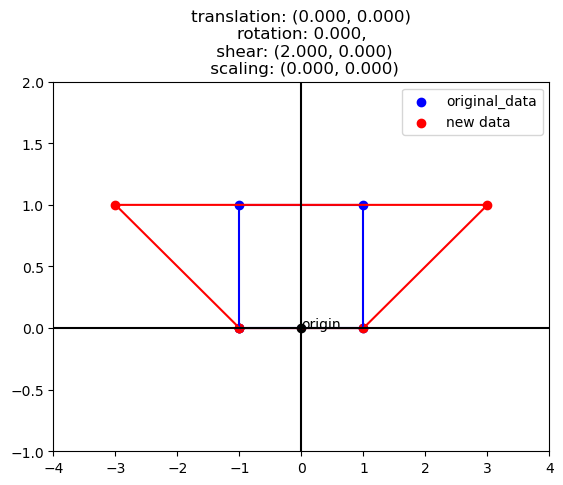

In [38]:
r2 = np.append(r2, [r2[0]]).reshape(r1.shape)
vt2.visualize_change(r1, r2, plot=True)

In [39]:
data_augmentation = VectorTransformation(translation_x=0.1, translation_y=0.1, shear_x=0.1, shear_y=0.1, reflection=False,
                                         rotation_angle=20, center_data=False, random=True)
frame = df.iloc[0].to_numpy()
frame = frame.reshape((75, 4))

x = data_augmentation.get_new_data(frames=all_frames, ratio=3, random=True)
x = np.array(x)
x.shape

(3, 74, 75, 4)

In [40]:
data_augmentation = VectorTransformation(translation_x=0.1, translation_y=0.1, shear_x=0.1, shear_y=0.1, reflection=False,
                                         rotation_angle=20, center_data=False, random=True)
frame = df.iloc[0].to_numpy()
frame = frame.reshape((75, 4))

x = data_augmentation.get_new_data(frames=all_frames, ratio=3, random=True)
x = np.array(x)
all_frames.shape

x[0].reshape((-1, 300)).shape


(74, 300)

In [41]:
path_4_labels = "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_4_labels_augmentation"
data_augmentation = VectorTransformation(translation_x=0.1, translation_y=0.1, shear_x=0.1, shear_y=0.1, reflection=False,
                                         rotation_angle=20, center_data=False, random=True)
num_coords = 21 + 21 + 33
headerList = []
for val in range(1, num_coords+1):
    headerList += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]
for folder in os.listdir(path_4_labels):
    if folder != ".DS_Store":
        files = os.listdir(os.path.join(path_4_labels, folder))
        for file in files:
            if file != ".DS_Store":
                file_path = (os.path.join(path_4_labels, folder, file))
                df = df.drop("class", axis=1)
                all_frames = df.to_numpy()
                print(all_frames.shape)
                all_frames = all_frames.reshape((len(df), 75, 4))
                new_frames = np.array(data_augmentation.get_new_data(frames=all_frames, ratio=3, random=True))
                for i in range(len(new_frames)):
                     # Rename the file
                    name = file + "_AUGMENTED_" + str(i) + ".csv"
                    video = new_frames[i].reshape((-1, 300))
                    pd.DataFrame(video).to_csv(os.path.join(path_4_labels, folder, name), header=headerList, index=False)

KeyError: "['class'] not found in axis"

In [42]:
data_augmentation = VectorTransformation(scale_x=0.2, scale_x=0.2, shear_x=0.1, shear_y=0.1, reflection=False,
                                         rotation_angle=20, center_data=False, random=True)
frame = df.iloc[0].to_numpy()
frame = frame.reshape((75, 4))

x = data_augmentation.get_new_data(frames=all_frames, ratio=3, random=True)
x = np.array(x)
x.shape


(3, 74, 75, 4)

In [18]:
def apply_transformation_on_array(transformation_func, arr):
    new_arr = []
    for frame in arr:
        new_frame = np.copy(frame)
        for i in range(frame.shape[0]):
            new_frame = transformation_func(new_frame)
          # new_frame[i][:3] = np.matmul(transformation_func(), new_frame[i][:3])
        new_arr.append(new_frame)
    return np.array(new_arr)




In [30]:
%run projective_geo.ipynb


In [20]:
def apply_transformation_on_data(folder_path, file_path, name, vectorObject, label):
    df = pd.read_csv(file_path)
    df = df.drop("class", axis=1)
    all_frames = df.to_numpy()
    print(all_frames.shape)
    num_coords = 21 + 21 + 33
    headerList = []
    for val in range(1, num_coords+1):
        headerList += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]
    all_frames = all_frames.reshape((len(df), 75, 4))
    new_frames = np.array(vectorObject.get_new_data(all_frames, ratio=1))
    video = new_frames.reshape((-1, 300))
    df = pd.DataFrame(video)
    df.columns = headerList
    df.insert(0, "class", [label for i in range(video.shape[0])])
    new_file = df.to_csv(os.path.join(folder_path, label, name), index=False)
    return new_file

In [21]:
vectorObject=VectorTransformation(translation_x=-0.5, translation_y=-0.5, center_data=True, random=True)
def apply_transformation_on_folder(folder_path):
    for folder in os.listdir(os.path.join(folder_path)):
        if folder != ".DS_Store":
            files = os.listdir(os.path.join(folder_path, folder))
            for file in files:
                apply_transformation_on_data(folder_path, file_path=os.path.join(folder_path, folder, file),
                                             name=os.path.splitext(file)[0] + "_translate_0.5_left" + ".csv", vectorObject=vectorObject, label=folder)

                

In [22]:
apply_transformation_on_folder("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/")

(72, 300)
(79, 300)
(91, 300)
(45, 300)
(61, 300)
(123, 300)
(95, 300)
(72, 300)
(91, 300)
(102, 300)
(71, 300)
(75, 300)
(81, 300)
(101, 300)
(120, 300)
(120, 300)
(95, 300)
(98, 300)
(71, 300)
(91, 300)
(91, 300)
(120, 300)
(72, 300)
(141, 300)
(120, 300)
(51, 300)
(81, 300)
(79, 300)
(72, 300)
(70, 300)
(51, 300)
(81, 300)
(45, 300)
(149, 300)
(81, 300)
(102, 300)
(120, 300)
(81, 300)
(97, 300)
(71, 300)
(81, 300)
(97, 300)
(81, 300)
(91, 300)
(72, 300)
(172, 300)
(78, 300)
(123, 300)
(120, 300)
(93, 300)
(51, 300)
(88, 300)
(79, 300)
(120, 300)
(123, 300)
(79, 300)
(149, 300)
(81, 300)
(91, 300)
(71, 300)
(149, 300)
(172, 300)
(149, 300)
(70, 300)
(71, 300)
(91, 300)
(172, 300)
(93, 300)
(141, 300)
(88, 300)
(71, 300)
(120, 300)
(149, 300)
(95, 300)
(81, 300)
(70, 300)
(102, 300)
(93, 300)
(51, 300)
(141, 300)
(88, 300)
(141, 300)
(141, 300)
(88, 300)
(72, 300)
(81, 300)
(120, 300)
(102, 300)
(97, 300)
(51, 300)
(61, 300)
(70, 300)
(79, 300)
(97, 300)
(62, 300)
(72, 300)
(141, 300)

In [31]:
def apply_projective_geo(folder_path):
    for folder in os.listdir(os.path.join(folder_path)):
        if folder != ".DS_Store":
            files = os.listdir(os.path.join(folder_path, folder))
            for file in files:
                xinlei_vinci(os.path.join(folder_path, folder, file), negativity = False)
                xinlei_vinci(os.path.join(folder_path, folder, file), negativity = True)

In [32]:
apply_projective_geo("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/")

/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/zdUALCKtOOk0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/zdUALCKtOOk0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2368_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2368_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10731_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/catBjk1p2bk0_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/catBjk1p2bk0_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/R_ES8RZua1g11185_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/R_ES8RZua1g11185_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/KsvdFnvMNAA5553_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/KsvdFnvMNAA5553_rota

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_rotation_15_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/LHQW0IYz7pI0_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/LHQW0IYz7pI0_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/H3jZwwuYOQA2995_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/H3jZwwuYOQA2995_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/KRrKqGEGdMg18884_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/A

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/catBjk1p2bk0_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/catBjk1p2bk0_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/catBjk1p2bk0_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/catBjk1p2bk0_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ou-7SRWs0e041_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentati

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_rotation_15_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FBD4NFz4QaA4056_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FBD4NFz4QaA4056_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/KRrKqGEGdMg18884_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/KRrKqGEGdMg18884_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/IbpJtH_QssM0_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ibp

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/N5ZUQxL4__c0_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/N5ZUQxL4__c0_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1671_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1671_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ou-7SRWs0e0308_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ou-7SRWs0e0308_reflection_rotation_15_scale_0.2.csv
/Users/a

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/1E8k8gI_xYk3420_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/1E8k8gI_xYk3420_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/H3jZwwuYOQA2915_reflection_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/H3jZwwuYOQA2915_reflection_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10731_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/A

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10731_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10731_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1731_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1731_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1831_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1W

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_translation_0.5_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10731_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10731_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/LHQW0IYz7pI0_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/LHQW0IYz7pI0_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/TXmuXH4fmu00_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/TXmuXH4fmu00_scale_0.2_translate_0.5_left.csv
/U

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_rotation_15_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/R_ES8RZua1g11185_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/R_ES8RZua1g11185_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/KRrKqGEGdMg18884_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/KRrKqGEGdMg18884_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10641_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WF

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/1E8k8gI_xYk3420_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/1E8k8gI_xYk3420_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/LHQW0IYz7pI0_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/LHQW0IYz7pI0_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/UXetwN_cI5A9114_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/UXetwN_cI5A9114_reflection_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_rotation_15_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/rIlQQTN2b586887_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/rIlQQTN2b586887_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1831.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1831.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/SJAhRxI7i9c1026_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/SJAhRxI7i9c1026_rotation_15.csv
/Users/aly/Doc

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ou-7SRWs0e041_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ou-7SRWs0e041_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/pl2FLu62aSA421_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/pl2FLu62aSA421_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/3m1X5NYCA_I238_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/UXetwN_cI5A9114_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/UXetwN_cI5A9114_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2228.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2228.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/498gWK7nFCI20_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/498gWK7nFCI20_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_rotation_15_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2418_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2418_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1671_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1671_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/rIlQQTN2b586887_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/rIlQQTN2b586887_reflection_translation_0.5.csv
/Users/aly/Documents/Pro

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10641_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10641_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/g59_3vr_NT01632_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/g59_3vr_NT01632_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/IbpJtH_QssM0_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentati

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_rotation_15_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/N5ZUQxL4__c0_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/N5ZUQxL4__c0_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1731_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1731_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/UXetwN_cI5A9114_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1731_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1731_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/1E8k8gI_xYk3420_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/1E8k8gI_xYk3420_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/ohjlMkxe1Wc1731_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labe

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/H3jZwwuYOQA2915_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/H3jZwwuYOQA2915_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/UXetwN_cI5A8984_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/UXetwN_cI5A8984_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/IbpJtH_QssM0_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/IbpJtH_QssM0_rotation_15_scale_0.2.csv
/U

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/KsvdFnvMNAA5553_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/KsvdFnvMNAA5553_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/zdUALCKtOOk0_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/zdUALCKtOOk0_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ou-7SRWs0e0308_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentat

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/SJAhRxI7i9c1026_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/SJAhRxI7i9c1026_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/3m1X5NYCA_I238_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/3m1X5NYCA_I238_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2418_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2418_re

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/IbpJtH_QssM0_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/IbpJtH_QssM0_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/TXmuXH4fmu00_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/TXmuXH4fmu00_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/FNt4N8WFuVY10731_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine 

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/TXmuXH4fmu00_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/TXmuXH4fmu00_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/LHQW0IYz7pI0_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/LHQW0IYz7pI0_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/TXmuXH4fmu00_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/TXmuXH4fmu00_rotation_15_tra

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_rotation_15_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ag5VPvAe8PA5557_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ag5VPvAe8PA5557_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/lvqGMGFmuV4325_reflection_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ou-7SRWs0e041_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/Ou-7SRWs0e041_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2228_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/sUC-XDC5TvA2228_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/zdUALCKtOOk0_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/dog/zdUALCKtOOk0_translation_0.5.cs

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection_rotation_15_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/k0T-yY_HrEQ325_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/k0T-yY_HrEQ325_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/creSIQ3owuo0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/creSIQ3owuo0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/XtkDeYBnR8o4846_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/XtkDeYBnR8o4846_r

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/2sGQuduhAf43239_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/2sGQuduhAf43239_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3471_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3471_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/AW2kJeqxKds0_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/PvzBgEcEPew5002_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/PvzBgEcEPew5002_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/wjbWyQLPqwQ0_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/wjbWyQLPqwQ0_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/n0PdKty8WRA5460_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augment

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/quk_XoRtZWk0_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/quk_XoRtZWk0_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU660_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU660_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/He0k3ddd67A8107_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/mil

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/m10sLOczXPk0_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/m10sLOczXPk0_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU660_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU660_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/k0T-yY_HrEQ195_reflection_scale_0.2.csv
/Users/aly/Documents/Progr

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/shPBfkIYYpU26282_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/shPBfkIYYpU26282_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3438_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3438_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/c0tloO5tJUY7810_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/JD_CiyDFnkM0_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/JD_CiyDFnkM0_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/k0T-yY_HrEQ455_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/k0T-yY_HrEQ455_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3438_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3438_translation_0.5

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/k0T-yY_HrEQ325_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/k0T-yY_HrEQ325_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/k0T-yY_HrEQ325_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/k0T-yY_HrEQ325_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU390_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection_rotation_15_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_rotation_15_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_rotation_15_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/D9wjtk3SKFM3819_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/D9wjtk3SKFM3819_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/JD_CiyDFnkM0_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/JD_CiyDFnkM0_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU550_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU550_reflection_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/shPBfkIYYpU26385_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/shPBfkIYYpU26385_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3438_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3438_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/MIPvaUKFA4c750_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_f

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/JD_CiyDFnkM0_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/JD_CiyDFnkM0_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/XtkDeYBnR8o4816_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/XtkDeYBnR8o4816_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/_wijo648v0g3092_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/_wijo648v0g3092_reflection.csv
/Users/aly/Documents/Programmi

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection_rotation_15_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/rkQZQhloXuE4918_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/rkQZQhloXuE4918_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/c0tloO5tJUY7810_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/c0tloO5tJUY7810_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/stsGYdklN_k3319_reflection_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection_rotation_15_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/D9wjtk3SKFM3819_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/D9wjtk3SKFM3819_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/XtkDeYBnR8o4846_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/XtkDeYBnR8o4846_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3471_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentati

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/htsdwxJ-fTo302_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/htsdwxJ-fTo302_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/rkQZQhloXuE4918_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/rkQZQhloXuE4918_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/c0tloO5tJUY7810_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmen

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/He0k3ddd67A8107_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/He0k3ddd67A8107_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU660_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU660_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU300_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6Ur

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_reflection.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/n0PdKty8WRA5460_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/n0PdKty8WRA5460_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/q38xuZH11jw5038_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/q38xuZH11jw5038_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6Mmgrtw_Zro869_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6Mmgrtw_Zro869_reflection_scale_0.2_tra

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/PvzBgEcEPew5002_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/PvzBgEcEPew5002_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/jDCw7stJaM43664_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU660_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/6UrcyZ-QeiU660_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3368_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3368_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88xW4xPY3368_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/milk/qAF88

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vE4RFGPqGqY5721_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vE4RFGPqGqY5721_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15740_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Do

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_rotation_15_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/Rz2NwFuHic80_reflection_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/Rz2NwFuHic80_reflection_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FUHOIo_8o9w4459_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FUHOIo_8o9w4459_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/uVLwe5c7LaQ0_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labe

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013680_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013680_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection_rotation_15_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection_rotation_15_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/uVLwe5c7LaQ0_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/uVLwe5c7LaQ0_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/fKjsdtMU3fc8470_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/fKjsdtMU3fc8470_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/hUrfB8bikfw1380_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/hUrfB8bikfw13

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013790_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013790_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/_wijo648v0g3208_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/_wijo648v0g3208_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706789_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/A

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/fKjsdtMU3fc8470_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augment

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4505_reflection_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentat

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_rotation_15_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FEZ2sZmYRbI0_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FEZ2sZmYRbI0_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/hUrfB8bikfw1380_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/hUrfB8bikfw1380_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FUHOIo_8o9w4459_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FUHOIo_8o9w4459_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/_wijo648v0g3208_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/_wijo648v0g3208_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/fKjsdtMU3fc8470_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection_rotation_15_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706789_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706789_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_reflection_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/mCjHYreiZ2417341_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/mCjHYreiZ2417341_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/KFSLtsOwZiU1121_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Pro

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_reflection_rotation_15_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4637_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4637_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FUHOIo_8o9w4459_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FUHOIo_8o9w4459_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4505_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augme

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_reflection.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/uVLwe5c7LaQ0_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FEZ2sZmYRbI0_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FEZ2sZmYRbI0_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7209_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_fo

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/n0PdKty8WRA2084_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/n0PdKty8WRA2084_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/q38xuZH11jw4313_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/q38xuZH11jw4313_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/hUrfB8bikfw1437_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/hUrfB8bikfw1437_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FEZ2sZmYRbI0_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FEZ2sZmYRbI0_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_rotatio

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013680_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013680_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_translation_0.5.csv
/Users/aly/Documents/Progr

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/fKjsdtMU3fc8470_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/fKjsdtMU3fc8470_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/ax2UGtA8h3E2137_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_l

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/nHnqAu_1K-c3396_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/nHnqAu_1K-c3396_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FEZ2sZmYRbI0_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FEZ2sZmYRbI0_reflection_scale_0.2.csv
/U

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_rotation_15_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7209_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7209_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_f

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_reflection_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/n0PdKty8WRA2084_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/n0PdKty8WRA2084_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706789_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706789_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/Rz2NwFuHic80_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augment

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/da

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_reflection_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/mCjHYreiZ2417341_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/mCjHYreiZ2417341_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/mCjHYreiZ2417341_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/dat

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/KFSLtsOwZiU1121_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/KFSLtsOwZiU1121_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/fKjsdtMU3fc8470_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/fKjsdtMU3fc8470_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013790_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013790_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Lear

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4637_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4637_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15970_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vE4RFGPqGqY5721_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vE4RFGPqGqY5721_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Doc

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4505_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4505_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/2sGQuduhAf41354.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/2sGQuduhAf41354.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15740_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15740_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/2sGQuduhAf41354_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/2sGQuduhAf41354_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/blZ0jXHGbYI0_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/blZ0jXHGbYI0_reflection_rotation

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4637_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4637_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013680_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013680_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_reflection_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/_wijo648v0g3208_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/_wijo648v0g3208_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7209_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/q38xuZH11jw4313.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/q38xuZH11jw4313.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/nHnqAu_1K-c3396_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/nHnqAu_1K-c3396_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_reflection_translate_0.5_left.csv
/Users/aly/Documents/P

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_reflection_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/KFSLtsOwZiU1121_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/KFSLtsOwZiU1121_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013680_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CxTSVyM-ij013680_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/fKjsdtMU3fc8470_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/d

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/2sGQuduhAf41354_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/2sGQuduhAf41354_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/ax2UGtA8h3E2137_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/ax2UGtA8h3E2137_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15740_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15740_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/FNt4N8WFuVY15740_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/CSj7IScvZnE5770_reflection_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vE4RFGPqGqY5721_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vE4RFGPqGqY5721_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4637_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/jzemBg_G8zU4637_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_reflection_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/MIPvaUKFA4c303_reflection_t

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/sErq0TJMKEo4730_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/vcB472PRkJM0.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/2sGQuduhAf41354_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/2sGQuduhAf41354_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/ax2UGtA8h3E2137_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/c

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7125.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706789_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706789_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7209_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/c0tloO5tJUY7209_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffee/eeHS78JyN706909_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/coffe

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo598_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo598_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12667_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12667_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12221_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_rotation_15_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12667_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12667_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WCGDN5CniTY0_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WCGDN5CniTY0_rota

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/rnr_aY0X0dQ5683_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/rnr_aY0X0dQ5683_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/SiTBL7DYzZQ1382_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/tO6x4rdDNXk5265_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/tO6x4rdDNXk5265_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/RAtOGNDP0dg3854_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/RAtOGNDP0dg3854_reflection_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/Ip1L7UrulFE0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/Ip1L7UrulFE0_reflection_rotation_15_translate

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12581_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12581_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/Ip1L7UrulFE0_reflection_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/eMZdggjnLQA5067_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/eMZdggjnLQA5067_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/A0TTA7Rlkzc2027_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/A0TTA7Rlkzc2027_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_rotation_15_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/2VB3WN8adyM7255_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/2VB3WN8adyM7255_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/iWJgaNo9Z041756_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Doc

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_rotation_15.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/iWJgaNo9Z041756_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/iWJgaNo9Z041756_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/rnr_aY0X0dQ5683_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/rnr_aY0X0dQ5683_reflection_rotation_15_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/2VB3WN8adyM7255_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_au

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_rotation_15_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/Ip1L7UrulFE0_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/Ip1L7UrulFE0_reflection_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12581_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12581_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/da

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_rotation_15_translation_0.5_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/Y24sRF_8lFU0_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/Y24sRF_8lFU0_reflection_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_rotation_15_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/xzIU5tmBrLc0_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/xzIU5tmBrLc0_reflection.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/rnr_aY0X0dQ5683_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/rnr_aY0X0dQ5683_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WCGDN5CniTY0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WCGDN5CniTY0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/A

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_rotation_15_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/Y24sRF_8lFU0_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/Y24sRF_8lFU0_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12667_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12667_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WxY7E9P46DM6078_reflection_rotation_15_translation_0.5_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo679_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo679_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_rotation_15_translation_0.5.csv
/Users/a

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_rotation_15_translation_0.5_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/SiTBL7DYzZQ1382_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/SiTBL7DYzZQ1382_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/tO6x4rdDNXk5375.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/tO6x4rdDNXk5375.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/0bIF7jh6lnE4677_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/0bIF7jh6lnE4677_reflection_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_scale_0.2_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_reflection_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo679_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo679_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/0bIF7jh6lnE4639_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_rotation_15_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo679_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo679_rotation_15_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/UjiCWH8PSvM832_reflection_rotation_15.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_reflection

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_translate_0.5_left.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/wqiiw7AzMQY0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/wqiiw7AzMQY0_reflection_rotation_15_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/A0TTA7Rlkzc1947_reflection_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/A0TTA7Rlkzc1947_reflection_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/A0TTA7Rlkzc1947_reflection_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_l

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_scale_0.2.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/tO6x4rdDNXk5375_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/tO6x4rdDNXk5375_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/K4lo0NZDlH86823_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/K4lo0NZDlH86823_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo598_reflection_rotation_15_translation_0.5_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_au

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/xzIU5tmBrLc0_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/xzIU5tmBrLc0_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12221_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/nHnqAu_1K-c12221_rotation_15_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo598_translation_0.5.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/j8a5Z-5lUwo598_tr

/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/WGfiiDgrq1I3897_reflection_rotation_15_translation_0.5.csv


/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x-ax)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
/var/folders/mx/d620gz8j2_x32mmsnvc4bzkh0000gn/T/ipykernel_58098/921842458.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)


/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/0bIF7jh6lnE4639_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/0bIF7jh6lnE4639_translation_0.5_scale_0.2_translate_0.5_left.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/fNg_sJ9f8EI13768_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/iWJgaNo9Z041756_rotation_15_scale_0.2.csv
/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation/door/iWJgaNo9Z041756_rotation_15_scale_

In [ ]:
def translation_matrix(self):
    return np.array([[1, 0, self.tx],
                    [0, 1, self.ty],
                    [0, 0, 1]])

def rotation_matrix(self):
  return np.array([[cos(self.angle), -sin(self.angle), 0], 
                      [sin(self.angle), cos(self.angle), 0],
                      [0, 0, 1]])

def shearx_matrix(self, sign=0):
  return np.array([[1, ((-1)**sign)*self.shx, 0],
                    [0, 1, 0], 
                    [0, 0, 1]])
  
def sheary_matrix(self, sign=0):
  return np.array([[1, 0, 0],
                    [((-1)**sign)*self.shy, 1, 0],
                    [0, 0, 1]])
  
def scaling_matrix(self):
  return np.array([[1+self.scale_x, 0, 0],
                    [0, 1+self.scale_y, 0], 
                    [0, 0, 1]])
  
def reflection_matrix(self):
  return np.array([[(-1)**(int(self.reflect)), 0, 0],
                    [0, 1, 0], 
                    [0, 0, 1]])